# SQL Server DBA Monitoring and Health Check Activities

1. **Performance Monitoring**:
   - CPU Utilization
   - Memory Usage
   - Disk I/O Activity
   - Query Execution Times

2. **Database Health Checks**:
   - Database Consistency Checks (DBCC)
   - Index Fragmentation and Rebuilding
   - Statistics Updates
   - Log File Checks

3. **Security Audits**:
   - Login and User Access Reviews
   - Audit Failed Login Attempts
   - Check for Unusual Database Access Patterns

4. **Backup and Recovery**:
   - Backup Status and Schedule Reviews
   - Test Restores to Validate Backup Integrity
   - Review Backup Sizes and Growth Trends

5. **Job and Agent Monitoring**:
   - Job Success and Failure Rates
   - Duration and Frequency of Jobs
   - Alerts on Job Failures

6. **Capacity Planning**:
   - Database Size Monitoring
   - Data Growth Trends
   - Future Resource Requirements Forecasting

7. **Error Log Management**:
   - SQL Server Error Logs
   - Windows Event Logs
   - Application Logs Related to SQL Server

8. **Replication Monitoring**:
   - Replication Status
   - Latency and Throughput
   - Conflict Detection and Resolution

9. **High Availability and Disaster Recovery Checks**:
   - Role Status (Primary, Secondary)
   - Synchronization Status
   - Failover Readiness

10. **License and Resource Compliance**:
    - License Utilization
    - Resource Allocation vs. Usage Analysis

11. **Custom Alerts and Notifications**:
    - Custom Performance Threshold Alerts
    - Database Availability Alerts
    - System Health Alerts


# Install Tools

In [7]:
# !pip install pyodbc
# !pip install matplotlib


In [8]:
import pyodbc
import matplotlib.pyplot as plt

# Connect Server

In [9]:
import pyodbc

# Replace these with your connection details
server = 'NAYEEMISLAM'
database = 'master'
username = ''
password = ''

# Setup the connection string
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Establish the connection
conn = pyodbc.connect(connection_string)

print("Connection established!")


# Create a cursor object using the connection
cursor = conn.cursor()

Connection established!


In [10]:

# Example query to fetch server version to test the connection
cursor.execute("SELECT @@VERSION;")
result = cursor.fetchone()
print(result[0])



Microsoft SQL Server 2022 (RTM) - 16.0.1000.6 (X64) 
	Oct  8 2022 05:58:25 
	Copyright (C) 2022 Microsoft Corporation
	Developer Edition (64-bit) on Windows 10 Home Single Language 10.0 <X64> (Build 22631: ) (Hypervisor)



# Performance Monitoring

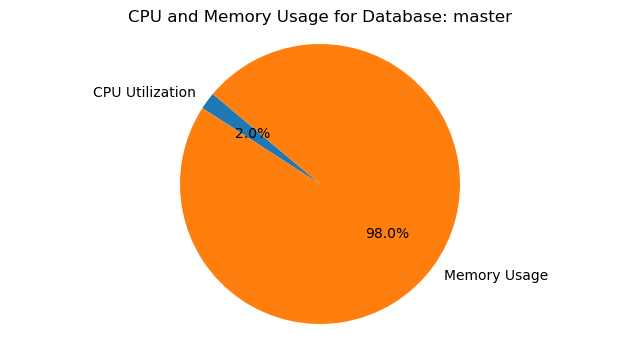

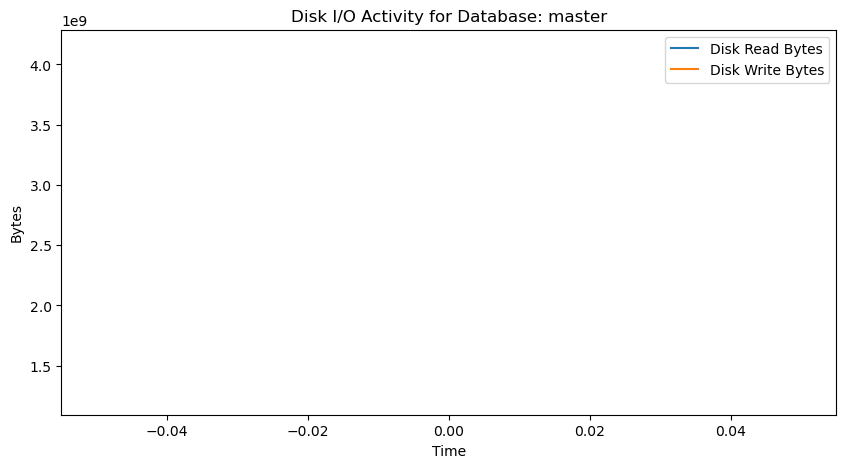

Query Execution Time for Database master: 0.0010085105895996094 seconds


In [19]:
# Step 1: Performance Monitoring for a specific database

# Code (Python + Query)
import psutil
import time

# Function to get CPU utilization
def get_cpu_utilization():
    return psutil.cpu_percent(interval=1)

# Function to get memory usage
def get_memory_usage():
    memory = psutil.virtual_memory()
    return memory.percent

# Function to get disk I/O activity
def get_disk_io_activity():
    disk_io = psutil.disk_io_counters()
    return disk_io.read_bytes, disk_io.write_bytes

# Function to execute a sample query and measure execution time
def execute_sample_query(database_name):
    start_time = time.time()
    # Execute a sample SELECT query specific to the database
    cursor.execute(f'USE [{database_name}]; SELECT * FROM YourSampleTable')
    end_time = time.time()
    return end_time - start_time

# Get a list of all databases on the server
cursor.execute("SELECT name FROM sys.databases WHERE state_desc = 'ONLINE'")
databases = [row[0] for row in cursor.fetchall()]

# Choose a specific database for visualization
database_to_visualize = databases[0]

# Execute the functions to get performance metrics for the chosen database
cursor.execute(f"USE [{database_to_visualize}]")
cpu_utilization = get_cpu_utilization()
memory_usage = get_memory_usage()
disk_read_bytes, disk_write_bytes = get_disk_io_activity()
query_execution_time = execute_sample_query(database_to_visualize)

# Visuals
import matplotlib.pyplot as plt

# Create pie chart for CPU and memory usage
labels = ['CPU Utilization', 'Memory Usage']
sizes = [cpu_utilization, memory_usage]
plt.figure(figsize=(8, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(f'CPU and Memory Usage for Database: {database_to_visualize}')
plt.show()

# Plot disk I/O activity
plt.figure(figsize=(10, 5))
plt.plot([disk_read_bytes], label='Disk Read Bytes')
plt.plot([disk_write_bytes], label='Disk Write Bytes')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.title(f'Disk I/O Activity for Database: {database_to_visualize}')
plt.legend()
plt.show()

# Print query execution time
print(f"Query Execution Time for Database {database_to_visualize}: {query_execution_time} seconds")


# Database Health Checks

In [20]:
# Step 2: Database Health Checks

# Code (Python + Query)

# Function to perform database consistency check (DBCC)
def perform_dbcc(database_name):
    cursor.execute(f"USE [{database_name}]; DBCC CHECKDB")
    # You can add further processing of the DBCC results if needed

# Function to check index fragmentation and rebuild indexes
def check_index_fragmentation_and_rebuild(database_name):
    cursor.execute(f"USE [{database_name}]; SELECT * FROM sys.dm_db_index_physical_stats(DB_ID(), NULL, NULL, NULL, 'DETAILED')")
    # You can add logic to analyze index fragmentation and schedule index rebuilds

# Function to update statistics
def update_statistics(database_name):
    cursor.execute(f"USE [{database_name}]; EXEC sp_updatestats")
    # You can add further processing or analysis of statistics if needed

# Function to check log file growth and usage
def check_log_file(database_name):
    cursor.execute(f"USE [{database_name}]; DBCC SQLPERF(LOGSPACE)")
    # You can add logic to analyze log file growth and usage

# Get a list of all databases on the server
cursor.execute("SELECT name FROM sys.databases WHERE state_desc = 'ONLINE'")
databases = [row[0] for row in cursor.fetchall()]

# Perform health checks for each database
for database in databases:
    print(f"Performing health checks for Database: {database}")
    perform_dbcc(database)
    check_index_fragmentation_and_rebuild(database)
    update_statistics(database)
    check_log_file(database)
    print("Health checks completed.\n")


Performing health checks for Database: master
Health checks completed.

Performing health checks for Database: tempdb
Health checks completed.

Performing health checks for Database: model
Health checks completed.

Performing health checks for Database: msdb
Health checks completed.



# Security Audits

In [21]:
# Step 3: Security Audits

# Code (Python + Query)

# Function to review login and user access
def review_login_and_user_access():
    cursor.execute("SELECT name, type_desc FROM sys.server_principals WHERE type_desc IN ('WINDOWS_LOGIN', 'SQL_LOGIN')")
    # You can add further processing or analysis of login and user access
    
# Function to audit failed login attempts
def audit_failed_login_attempts():
    cursor.execute("SELECT * FROM sys.dm_exec_sessions WHERE is_user_process = 1 AND login_name <> '' AND status = 'running'")
    # You can add further processing or analysis of failed login attempts
    
# Function to check for unusual database access patterns
def check_unusual_access_patterns():
    cursor.execute("SELECT * FROM sys.dm_exec_sessions WHERE is_user_process = 1 AND login_name <> '' AND status = 'running'")
    # You can add logic to analyze database access patterns and detect unusual behavior

# Review login and user access
print("Reviewing login and user access:")
review_login_and_user_access()
print("Login and user access review completed.\n")

# Audit failed login attempts
print("Auditing failed login attempts:")
audit_failed_login_attempts()
print("Audit of failed login attempts completed.\n")

# Check for unusual database access patterns
print("Checking for unusual database access patterns:")
check_unusual_access_patterns()
print("Check for unusual database access patterns completed.\n")


Reviewing login and user access:
Login and user access review completed.

Auditing failed login attempts:
Audit of failed login attempts completed.

Checking for unusual database access patterns:
Check for unusual database access patterns completed.



# Backup and Recovery

In [25]:
# Step 4: Backup and Recovery

# Function to review backup status and schedule
def review_backup_status_and_schedule():
    cursor.execute("SELECT database_name, backup_start_date, backup_finish_date, type FROM msdb.dbo.backupset ORDER BY backup_start_date DESC")
    # You can add further processing or analysis of backup status and schedule
    backup_records = cursor.fetchall()
    for record in backup_records:
        print(f"Database: {record[0]}, Backup Start Date: {record[1]}, Backup Finish Date: {record[2]}, Type: {record[3]}")

# Function to test restores to validate backup integrity
def test_restores(database_name):
    # You can add logic to perform test restores and validate backup integrity
    print(f"Testing restores for database: {database_name}")

# Function to review backup sizes and growth trends
def review_backup_sizes_and_growth_trends():
    cursor.execute("SELECT database_name, backup_size, backup_start_date FROM msdb.dbo.backupset ORDER BY backup_start_date DESC")
    # You can add further processing or analysis of backup sizes and growth trends
    backup_records = cursor.fetchall()
    for record in backup_records:
        print(f"Database: {record[0]}, Backup Size: {record[1]} bytes, Backup Start Date: {record[2]}")

# Review backup status and schedule
print("Reviewing backup status and schedule:")
review_backup_status_and_schedule()
print("Backup status and schedule review completed.\n")

# Test restores to validate backup integrity (for a specific database)
print("Testing restores to validate backup integrity:")
test_restores("YourExistingDatabaseName")
print("Restore test completed.\n")

# Review backup sizes and growth trends
print("Reviewing backup sizes and growth trends:")
review_backup_sizes_and_growth_trends()
print("Backup sizes and growth trends review completed.\n")


Reviewing backup status and schedule:
Backup status and schedule review completed.

Testing restores to validate backup integrity:
Testing restores for database: YourExistingDatabaseName
Restore test completed.

Reviewing backup sizes and growth trends:
Backup sizes and growth trends review completed.



# Job and Agent Monitoring

In [27]:
# Step 5: Job and Agent Monitoring

# Code (Python + Query)

# Function to monitor job success and failure rates
def monitor_job_success_and_failure():
    cursor.execute("SELECT name, enabled FROM msdb.dbo.sysjobs")
    # You can add further processing or analysis of job success and failure rates
    job_records = cursor.fetchall()
    for record in job_records:
        print(f"Job: {record[0]}, Enabled: {record[1]}")

# Function to monitor duration and frequency of jobs
def monitor_job_duration_and_frequency():
    cursor.execute("SELECT name, date_created, date_modified FROM msdb.dbo.sysjobs")
    # You can add further processing or analysis of job duration and frequency
    job_records = cursor.fetchall()
    for record in job_records:
        print(f"Job: {record[0]}, Date Created: {record[1]}, Date Modified: {record[2]}")

# Function to receive alerts on job failures
def receive_alerts_on_job_failures():
    cursor.execute("SELECT name FROM msdb.dbo.sysjobs WHERE enabled = 1 AND job_id IN (SELECT job_id FROM msdb.dbo.sysjobhistory WHERE run_status = 0)")
    # You can add logic to send alerts for job failures
    job_failures = cursor.fetchall()
    if job_failures:
        print("Alert: The following jobs have failed:")
        for job_failure in job_failures:
            print(job_failure[0])
    else:
        print("No job failures detected.")

# Monitor job success and failure rates
print("Monitoring job success and failure rates:")
monitor_job_success_and_failure()
print("Job success and failure rates monitoring completed.\n")

# Monitor duration and frequency of jobs
print("Monitoring duration and frequency of jobs:")
monitor_job_duration_and_frequency()
print("Job duration and frequency monitoring completed.\n")

# Receive alerts on job failures
print("Receiving alerts on job failures:")
receive_alerts_on_job_failures()
print("Alerts on job failures completed.\n")


Monitoring job success and failure rates:
Job: syspolicy_purge_history, Enabled: 1
Job success and failure rates monitoring completed.

Monitoring duration and frequency of jobs:
Job: syspolicy_purge_history, Date Created: 2024-04-25 11:04:09.963000, Date Modified: 2024-04-25 11:04:10.130000
Job duration and frequency monitoring completed.

Receiving alerts on job failures:
No job failures detected.
Alerts on job failures completed.



# Capacity Planning

In [28]:
# Step 6: Capacity Planning

# Code (Python + Query)

# Function to monitor database size
def monitor_database_size():
    cursor.execute("SELECT name, size * 8 / 1024 AS size_MB FROM sys.master_files WHERE type = 0")
    # You can add further processing or analysis of database size
    database_sizes = cursor.fetchall()
    for database_size in database_sizes:
        print(f"Database: {database_size[0]}, Size: {database_size[1]} MB")

# Function to monitor data growth trends
def monitor_data_growth_trends():
    cursor.execute("SELECT name, create_date FROM sys.databases")
    # You can add further processing or analysis of data growth trends
    database_creation_dates = cursor.fetchall()
    for database_creation_date in database_creation_dates:
        print(f"Database: {database_creation_date[0]}, Creation Date: {database_creation_date[1]}")

# Function to forecast future resource requirements
def forecast_future_resource_requirements():
    # You can add logic to forecast future resource requirements based on data growth trends and usage patterns
    print("Forecasting future resource requirements...")
    # Example: Analyze data growth trends and predict future database sizes, CPU, memory, and disk requirements

# Monitor database size
print("Monitoring database size:")
monitor_database_size()
print("Database size monitoring completed.\n")

# Monitor data growth trends
print("Monitoring data growth trends:")
monitor_data_growth_trends()
print("Data growth trends monitoring completed.\n")

# Forecast future resource requirements
print("Forecasting future resource requirements:")
forecast_future_resource_requirements()
print("Resource requirements forecasting completed.\n")


Monitoring database size:
Database: master, Size: 5 MB
Database: tempdev, Size: 8 MB
Database: temp2, Size: 8 MB
Database: temp3, Size: 8 MB
Database: temp4, Size: 8 MB
Database: temp5, Size: 8 MB
Database: temp6, Size: 8 MB
Database: temp7, Size: 8 MB
Database: temp8, Size: 8 MB
Database: modeldev, Size: 8 MB
Database: MSDBData, Size: 18 MB
Database size monitoring completed.

Monitoring data growth trends:
Database: master, Creation Date: 2003-04-08 09:13:36.390000
Database: tempdb, Creation Date: 2024-05-02 16:16:26.843000
Database: model, Creation Date: 2003-04-08 09:13:36.390000
Database: msdb, Creation Date: 2022-10-08 06:31:57.550000
Data growth trends monitoring completed.

Forecasting future resource requirements:
Forecasting future resource requirements...
Resource requirements forecasting completed.



# Error Log Management

In [31]:
# Step 7: Error Log Management

# Code (Python + Query)

# Function to monitor SQL Server error logs
def monitor_sql_server_error_logs():
    cursor.execute("EXEC xp_readerrorlog")
    # You can add further processing or analysis of SQL Server error logs
    error_logs = cursor.fetchall()
    for error_log in error_logs:
        print(error_log)

# Function to monitor Windows Event logs related to SQL Server
def monitor_windows_event_logs():
    # Placeholder for monitoring Windows Event logs related to SQL Server
    pass

# Function to monitor application logs related to SQL Server
def monitor_application_logs():
    # Placeholder for monitoring application logs related to SQL Server
    pass

# Monitor SQL Server error logs
print("Monitoring SQL Server error logs:")
monitor_sql_server_error_logs()
print("SQL Server error log monitoring completed.\n")

# Monitor Windows Event logs related to SQL Server
print("Monitoring Windows Event logs related to SQL Server:")
monitor_windows_event_logs()
print("Windows Event log monitoring completed.\n")

# Monitor application logs related to SQL Server
print("Monitoring application logs related to SQL Server:")
monitor_application_logs()
print("Application log monitoring completed.\n")


Monitoring SQL Server error logs:
(datetime.datetime(2024, 5, 2, 16, 16, 26, 60000), 'Server', 'Microsoft SQL Server 2022 (RTM) - 16.0.1000.6 (X64) \r\n\tOct  8 2022 05:58:25 \r\n\tCopyright (C) 2022 Microsoft Corporation\r\n\tDeveloper Edition (64-bit) on Windows 10 Home Single Language 10.0 <X64> (Build 22631: ) (Hypervisor)\r\n')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 60000), 'Server', 'UTC adjustment: 6:00')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 60000), 'Server', '(c) Microsoft Corporation.')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 70000), 'Server', 'All rights reserved.')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 70000), 'Server', 'Server process ID is 11028.')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 70000), 'Server', "System Manufacturer: 'HP', System Model: 'HP ProBook 445 G8 Notebook PC'.")
(datetime.datetime(2024, 5, 2, 16, 16, 26, 70000), 'Server', 'Authentication mode is WINDOWS-ONLY.')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 70000), 'Server', "Logging SQL

In [32]:
# Function to monitor SQL Server error logs
def monitor_sql_server_error_logs():
    cursor.execute("EXEC xp_readerrorlog")
    # You can add further processing or analysis of SQL Server error logs
    error_logs = cursor.fetchall()
    for error_log in error_logs:
        print(error_log)

# Function to monitor Windows Event logs related to SQL Server
def monitor_windows_event_logs():
    # Placeholder for monitoring Windows Event logs related to SQL Server
    print("Monitoring Windows Event logs related to SQL Server:")
    # Add your code here to monitor Windows Event logs
    print("Windows Event log monitoring completed.\n")

# Function to monitor application logs related to SQL Server
def monitor_application_logs():
    # Placeholder for monitoring application logs related to SQL Server
    print("Monitoring application logs related to SQL Server:")
    # Add your code here to monitor application logs
    print("Application log monitoring completed.\n")

# Monitor SQL Server error logs
print("Monitoring SQL Server error logs:")
monitor_sql_server_error_logs()
print("SQL Server error log monitoring completed.\n")

# Monitor Windows Event logs related to SQL Server
monitor_windows_event_logs()

# Monitor application logs related to SQL Server
monitor_application_logs()



Monitoring SQL Server error logs:
(datetime.datetime(2024, 5, 2, 16, 16, 26, 60000), 'Server', 'Microsoft SQL Server 2022 (RTM) - 16.0.1000.6 (X64) \r\n\tOct  8 2022 05:58:25 \r\n\tCopyright (C) 2022 Microsoft Corporation\r\n\tDeveloper Edition (64-bit) on Windows 10 Home Single Language 10.0 <X64> (Build 22631: ) (Hypervisor)\r\n')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 60000), 'Server', 'UTC adjustment: 6:00')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 60000), 'Server', '(c) Microsoft Corporation.')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 70000), 'Server', 'All rights reserved.')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 70000), 'Server', 'Server process ID is 11028.')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 70000), 'Server', "System Manufacturer: 'HP', System Model: 'HP ProBook 445 G8 Notebook PC'.")
(datetime.datetime(2024, 5, 2, 16, 16, 26, 70000), 'Server', 'Authentication mode is WINDOWS-ONLY.')
(datetime.datetime(2024, 5, 2, 16, 16, 26, 70000), 'Server', "Logging SQL

# Replication Monitoring

In [58]:
# Function to monitor replication status
def monitor_replication_status():
    try:
        cursor.execute("SELECT name, is_published FROM sys.databases WHERE is_published = 1")
        replication_status = cursor.fetchall()
        for status in replication_status:
            print(f"Database: {status[0]}, Is Published: {status[1]}")
    except Exception as e:
        print(f"An error occurred while monitoring replication status: {str(e)}")

# Function to monitor replication latency and throughput
def monitor_replication_latency_and_throughput():
    try:
        cursor.execute("SELECT publication, subscriber_db, last_sync_status, latency, delivered_transactions_per_sec FROM distribution.dbo.MSreplication_monitordata")
        replication_metrics = cursor.fetchall()
        for metric in replication_metrics:
            print(f"Publication: {metric[0]}, Subscriber DB: {metric[1]}, Last Sync Status: {metric[2]}, Latency: {metric[3]}, Delivered Transactions Per Sec: {metric[4]}")
    except Exception as e:
        print(f"An error occurred while monitoring replication latency and throughput: {str(e)}")

# Function to monitor conflict detection and resolution
def monitor_conflict_detection_and_resolution():
    try:
        cursor.execute("SELECT publication, article, conflicting_row_count FROM distribution.dbo.MSrepl_errors")
        conflicts = cursor.fetchall()
        for conflict in conflicts:
            print(f"Publication: {conflict[0]}, Article: {conflict[1]}, Conflicting Row Count: {conflict[2]}")
    except Exception as e:
        print(f"An error occurred while monitoring conflict detection and resolution: {str(e)}")

# Print replication status
print("Replication Status:")
monitor_replication_status()
print("\n")

# Print replication latency and throughput
print("Latency and Throughput:")
monitor_replication_latency_and_throughput()
print("\n")

# Print conflict detection and resolution
print("Conflict Detection and Resolution:")
monitor_conflict_detection_and_resolution()
print("\n")


Replication Status:


Latency and Throughput:
An error occurred while monitoring replication latency and throughput: ('42S02', "[42S02] [Microsoft][ODBC SQL Server Driver][SQL Server]Invalid object name 'distribution.dbo.MSreplication_monitordata'. (208) (SQLExecDirectW)")


Conflict Detection and Resolution:
An error occurred while monitoring conflict detection and resolution: ('42S02', "[42S02] [Microsoft][ODBC SQL Server Driver][SQL Server]Invalid object name 'distribution.dbo.MSrepl_errors'. (208) (SQLExecDirectW)")




In [42]:
# Function to check if MSdistribution_status table exists
def check_distribution_status_table():
    cursor.execute("SELECT * FROM information_schema.tables WHERE table_schema = 'distribution' AND table_name = 'MSdistribution_status'")
    return cursor.fetchone() is not None

# Check if MSdistribution_status table exists
if check_distribution_status_table():
    print("MSdistribution_status table found.")
else:
    print("MSdistribution_status table not found.")


MSdistribution_status table not found.


# High Availability and Disaster Recovery Checks

In [57]:
# Function to monitor role status (Primary/Secondary)
def monitor_role_status():
    try:
        cursor.execute("SELECT replica_id, role_desc FROM sys.dm_hadr_availability_replica_states")
        role_status = cursor.fetchall()
        for status in role_status:
            print(f"Replica ID: {status[0]}, Role: {status[1]}")
    except Exception as e:
        print(f"An error occurred while monitoring role status: {str(e)}")

# Function to monitor synchronization status
def monitor_synchronization_status():
    try:
        cursor.execute("SELECT database_name, synchronization_state_desc FROM sys.dm_hadr_database_replica_states")
        sync_status = cursor.fetchall()
        for status in sync_status:
            print(f"Database: {status[0]}, Synchronization State: {status[1]}")
    except Exception as e:
        print(f"An error occurred while monitoring synchronization status: {str(e)}")

# Function to monitor failover readiness
def monitor_failover_readiness():
    try:
        cursor.execute("SELECT replica_server_name, is_failover_ready FROM sys.dm_hadr_availability_replica_cluster_states")
        failover_status = cursor.fetchall()
        for status in failover_status:
            print(f"Replica Server: {status[0]}, Failover Ready: {status[1]}")
    except Exception as e:
        print(f"An error occurred while monitoring failover readiness: {str(e)}")

# Print role status
print("Role Status (Primary/Secondary):")
monitor_role_status()
print("\n")

# Print synchronization status
print("Synchronization Status:")
monitor_synchronization_status()
print("\n")

# Print failover readiness
print("Failover Readiness:")
monitor_failover_readiness()
print("\n")


Role Status (Primary/Secondary):


Synchronization Status:
An error occurred while monitoring synchronization status: ('42S22', "[42S22] [Microsoft][ODBC SQL Server Driver][SQL Server]Invalid column name 'database_name'. (207) (SQLExecDirectW)")


Failover Readiness:
An error occurred while monitoring failover readiness: ('42S22', "[42S22] [Microsoft][ODBC SQL Server Driver][SQL Server]Invalid column name 'is_failover_ready'. (207) (SQLExecDirectW)")




# License and Resource Compliance

In [48]:
# Function to monitor license utilization
def monitor_license_utilization():
    cursor.execute("SELECT name, state_desc FROM sys.databases")
    # You can add further processing or analysis of license utilization
    license_info = cursor.fetchall()
    for info in license_info:
        print(f"Database: {info[0]}, State: {info[1]}")


# Function to monitor resource allocation vs. usage analysis
def monitor_resource_allocation_vs_usage_analysis():
    cursor.execute("SELECT * FROM sys.dm_os_performance_counters WHERE counter_name LIKE '%Memory%' OR counter_name LIKE '%CPU%'")
    # You can add further processing or analysis of resource allocation vs. usage analysis
    resource_info = cursor.fetchall()
    for info in resource_info:
        print(info)


# Print license utilization
print("License Utilization:")
monitor_license_utilization()
print("\n")

# Print resource allocation vs. usage analysis
print("Resource Allocation vs. Usage Analysis:")
monitor_resource_allocation_vs_usage_analysis()
print("\n")


License Utilization:
Database: master, State: ONLINE
Database: tempdb, State: ONLINE
Database: model, State: ONLINE
Database: msdb, State: ONLINE


Resource Allocation vs. Usage Analysis:
('SQLServer:Memory Broker Clerks                                                                                                  ', 'Memory broker clerk size                                                                                                        ', 'Buffer Pool                                                                                                                     ', 3961, 65792)
('SQLServer:Memory Broker Clerks                                                                                                  ', 'Memory broker clerk size                                                                                                        ', 'Column store object pool                                                                                                        ', 8, 65

# Custom Alerts and Notifications